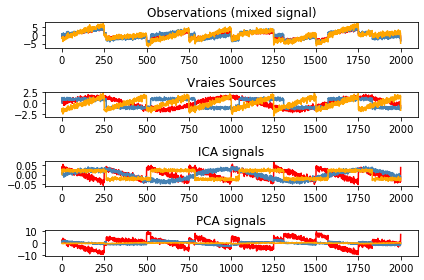

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.decomposition import FastICA, PCA

np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  
s2 = np.sign(np.sin(3 * time))  
s3 = signal.sawtooth(2 * np.pi * time)  

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  

S /= S.std(axis=0)  
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  
X = np.dot(S, A.T)  

ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  
A_ = ica.mixing_  

assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

pca = PCA(n_components=3)
H = pca.fit_transform(X)
plt.figure()

models = [X, S, S_, H]
names = ['Observations (signales mix)',
         'Vraies Sources',
         'ICA signals',
         'PCA signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()